In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
data="/Users/LENOVO/OneDrive/Desktop/hitha.git/sample/card.data"
df=pd.read_csv(data,header = None)

In [3]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df.columns=['buying','maint','doors','persons','lug_boot','safety','class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.shape

(1728, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for col in df.columns:
    print(df[col].value_counts())
    print()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In [8]:
df["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
X=df.drop("class",axis=1)

In [11]:
y=df["class"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low


In [14]:
import category_encoders as ce

In [26]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [30]:
X_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [32]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [34]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

In [39]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

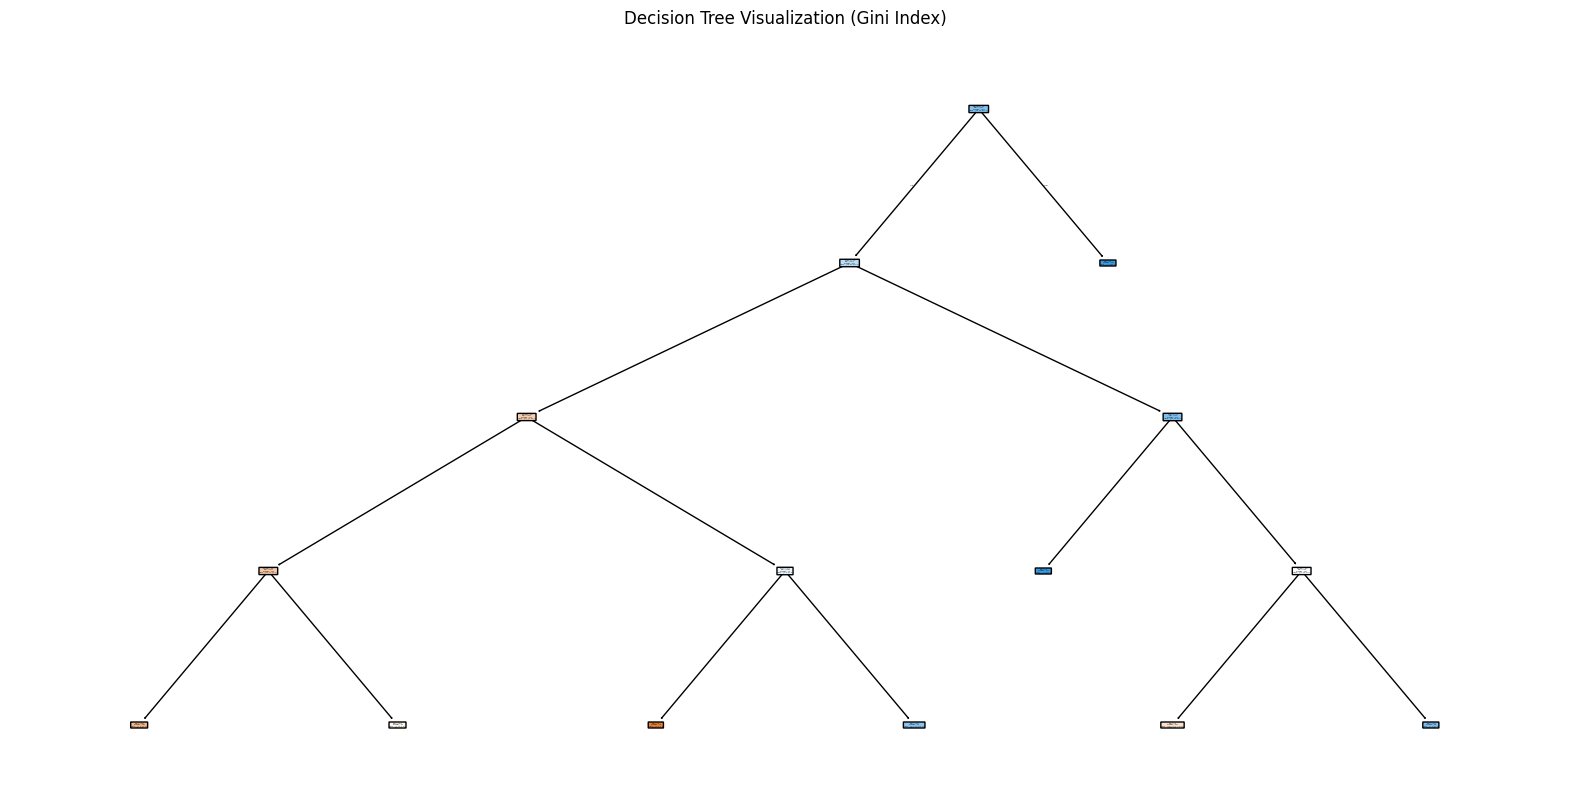

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

tree.plot_tree(
    clf_gini,
    feature_names=X_train.columns,
    class_names=[str(c) for c in clf_gini.classes_],
    filled=True,
    rounded=True,
    fontsize=0

)

plt.title("Decision Tree Visualization (Gini Index)")
plt.show()



In [43]:
y_pred_gini=clf_gini.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

print("Model Accuracy with criterion gini index:{0:.4f}",accuracy_score(y_test,y_pred_gini))

Model Accuracy with criterion gini index:{0:.4f} 0.8188824662813102


In [46]:
y_pred_gini=clf_gini.predict(X_test)

In [47]:
print("Training set score: {:.4f}".format(clf_gini.score(X_train,y_train)))
print("Test set score: {:.4f}".format(clf_gini.score(X_train,y_train)))

Training set score: 0.8180
Test set score: 0.8180


In [49]:
clf_en=DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [50]:
y_pred_en=clf_en.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8189


In [52]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'],
      shape=(1209,), dtype=object)

In [53]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8180
Test set score: 0.8189


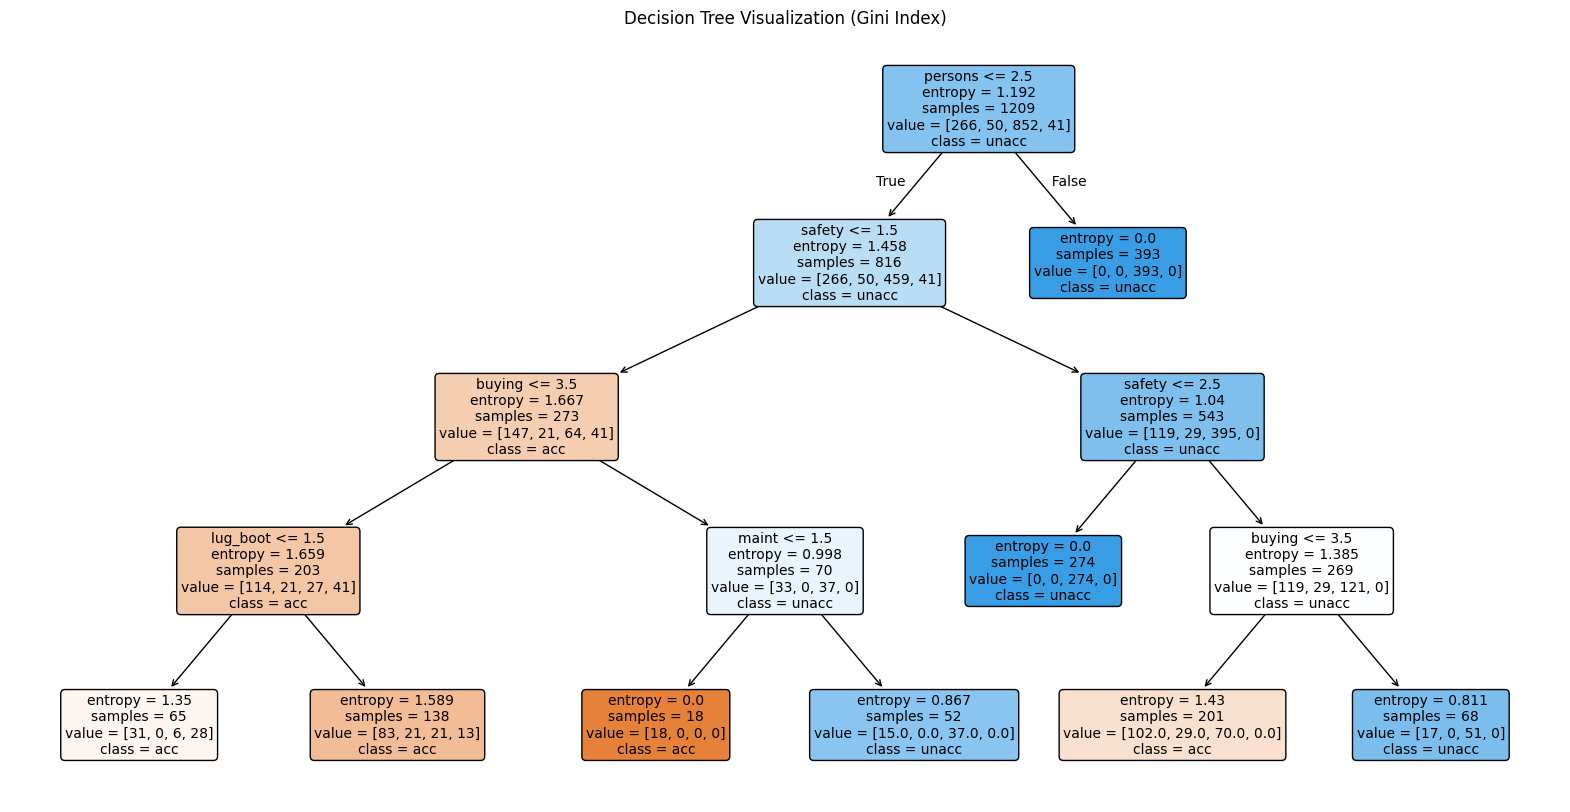

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt

# Visualize the trained decision tree
plt.figure(figsize=(20,10))  # make the plot big and clear

tree.plot_tree(
    clf_en,
    feature_names=X_train.columns,     # names of the input features
    class_names=[str(c) for c in clf_en.classes_],  # names of the target classes
    filled=True,        # color the nodes
    rounded=True,       # round the boxes
    fontsize=10
)

plt.title("Decision Tree Visualization (Gini Index)")
plt.show()